In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [6]:
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error,make_scorer,confusion_matrix

In [7]:
df= pd.read_csv(os.path.join(os.getcwd(),'data/train.csv'))
# test = pd.read_csv(os.path.join(os.getcwd(),'data/test.csv'))

In [30]:
train_df= pd.read_csv(os.path.join(os.getcwd(),'data/train.csv'))
test_df = pd.read_csv(os.path.join(os.getcwd(),'data/test.csv'))

In [9]:
df.set_index('Id',inplace=True)

## Exploratory Data Analysis

In [5]:
df.shape

(1460, 80)

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


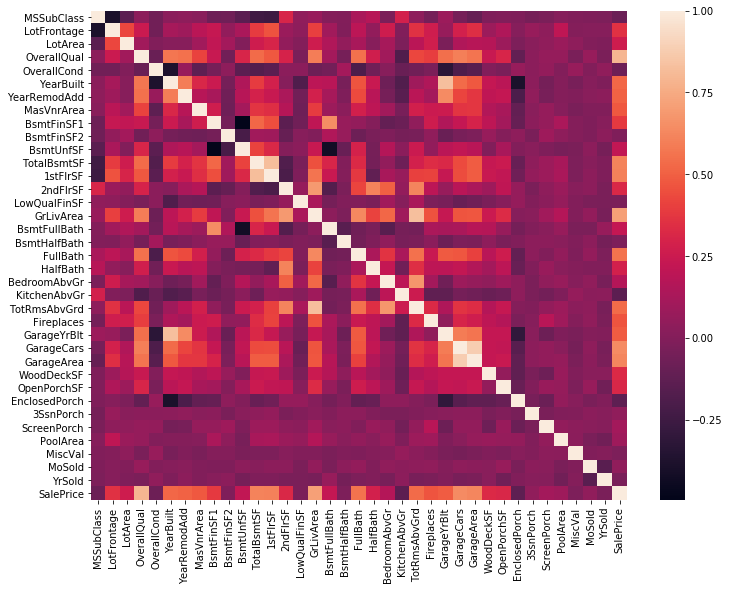

In [10]:
corr = df.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr)
## High numeric corr variables: OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)

## Missing Data

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [6]:
# df=df.drop((missing_data[missing_data.total>1]).index,1)
df=df.drop(df.loc[df.Electrical.isnull()].index)


## Advanced Linear Models

In [10]:
df.SalePrice = np.log1p(df.SalePrice)

In [11]:
y = df.SalePrice.values

In [12]:
## Fillna values
df.loc[:,'Alley'] =df.loc[:,'Alley'].fillna('None')
df.loc[:,'PoolQC']=df.loc[:,'PoolQC'].fillna('No')
df.loc[:,'MiscFeature']=df.loc[:,'MiscFeature'].fillna('No')
df.loc[:,'Fence']=df.loc[:,'Fence'].fillna('No')
df.loc[:,'FireplaceQu']=df.loc[:,'FireplaceQu'].fillna('No')
df.loc[:,'LotFrontage']=df.loc[:,'LotFrontage'].fillna(0)
df.loc[:,'GarageType']=df.loc[:,'GarageType'].fillna('No')
df.loc[:,'GarageFinish']=df.loc[:,'GarageFinish'].fillna('No')
df.loc[:,'GarageQual']=df.loc[:,'GarageQual'].fillna('No')
df.loc[:,'GarageCond']=df.loc[:,'GarageCond'].fillna('No')
df.loc[:,'GarageYrBlt']=df.loc[:,'GarageYrBlt'].fillna(0)
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")

In [13]:
df.replace({'MoSold':{1:'Jan',2:'Feb',3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}},inplace=True)

In [14]:
# Encode some categorical features as ordered numbers when there is information in the order
df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},inplace=True)
                

In [15]:
pd.DataFrame([df.corr().sort_values(by=['SalePrice'],ascending=False)['SalePrice']])

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,...,MiscVal,BsmtFinType2,OverallCond,YrSold,LowQualFinSF,LandSlope,MSSubClass,KitchenAbvGr,EnclosedPorch,LotShape
SalePrice,1.0,0.817185,0.700927,0.680625,0.67884,0.667893,0.650888,0.615804,0.612134,0.596981,...,-0.020021,-0.03136,-0.036868,-0.037263,-0.037963,-0.038526,-0.073959,-0.147548,-0.14905,-0.286002


### Features Engineering by simplification and combination of existing attributes

In [16]:
# Create new features
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [17]:
## Combinations of existing features 
df['OverallGrade']=df.OverallCond * df.OverallQual
df['GarageGrade'] = df.GarageCond * df.GarageQual
df['ExterGrade'] = df.ExterCond * df.ExterQual
df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
df["SimplPoolScore"] = df["PoolArea"] * df["SimplPoolQC"]
df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
df["SimplFireplaceScore"] = df["Fireplaces"] * df["SimplFireplaceQu"]
df["SimplKitchenScore"] = df["KitchenAbvGr"] * df["SimplKitchenQual"]

In [18]:
df['TotalBath']= df.BsmtFullBath + 0.5 * df.BsmtHalfBath + df.FullBath + 0.5*df.HalfBath
df['TotalSF']=df.GrLivArea + df.TotalBsmtSF
df['TotalFlrsSF'] = df['1stFlrSF']+df['2ndFlrSF']

In [19]:
df.corr().sort_values(by=['SalePrice'],ascending=False)['SalePrice']

SalePrice            1.000000
OverallQual          0.817185
TotalSF              0.773277
TotalFlrsSF          0.710275
SimplOverallQual     0.706083
GrLivArea            0.700927
GarageCars           0.680625
ExterQual            0.678840
TotalBath            0.673011
KitchenQual          0.667893
GarageScore          0.652614
GarageArea           0.650888
SimplExterQual       0.634737
SimplGarageScore     0.627143
BsmtQual             0.615804
TotalBsmtSF          0.612134
SimplKitchenQual     0.608832
OverallGrade         0.606873
1stFlrSF             0.596981
FullBath             0.594771
SimplBsmtQual        0.592108
YearBuilt            0.586570
ExterGrade           0.586472
YearRemodAdd         0.565608
FireplaceQu          0.546362
TotRmsAbvGrd         0.534422
SimplOverallGrade    0.524874
SimplKitchenScore    0.522602
FireplaceScore       0.520190
SimplFireplaceQu     0.513244
                       ...   
BedroomAbvGr         0.209043
SimplBsmtCond        0.202007
LotFrontag

In [20]:
# 3* Polynomials on the top 10 existing features
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3
df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
df["AllSF-2"] = df["TotalSF"] ** 2
df["AllSF-3"] = df["TotalSF"] ** 3
df["AllSF-Sq"] = np.sqrt(df["TotalSF"])
df["AllFlrsSF-2"] = df["TotalFlrsSF"] ** 2
df["AllFlrsSF-3"] = df["TotalFlrsSF"] ** 3
df["AllFlrsSF-Sq"] = np.sqrt(df["TotalFlrsSF"])
df["GrLivArea-2"] = df["GrLivArea"] ** 2
df["GrLivArea-3"] = df["GrLivArea"] ** 3
df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
df["SimplOverallQual-s2"] = df["SimplOverallQual"] ** 2
df["SimplOverallQual-s3"] = df["SimplOverallQual"] ** 3
df["SimplOverallQual-Sq"] = np.sqrt(df["SimplOverallQual"])
df["ExterQual-2"] = df["ExterQual"] ** 2
df["ExterQual-3"] = df["ExterQual"] ** 3
df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
df["GarageCars-2"] = df["GarageCars"] ** 2
df["GarageCars-3"] = df["GarageCars"] ** 3
df["GarageCars-Sq"] = np.sqrt(df["GarageCars"])
df["TotalBath-2"] = df["TotalBath"] ** 2
df["TotalBath-3"] = df["TotalBath"] ** 3
df["TotalBath-Sq"] = np.sqrt(df["TotalBath"])
df["KitchenQual-2"] = df["KitchenQual"] ** 2
df["KitchenQual-3"] = df["KitchenQual"] ** 3
df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
df["GarageScore-2"] = df["GarageScore"] ** 2
df["GarageScore-3"] = df["GarageScore"] ** 3
df["GarageScore-Sq"] = np.sqrt(df["GarageScore"])

#### Assign numerical & categorical features

In [21]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features=numerical_features.drop('SalePrice')
train_num = df[numerical_features]
train_cat = df[categorical_features]
train_num = train_num.fillna(train_num.median())

In [22]:
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness)>0.5]
skewed_features= skewness.index
train_num[skewed_features] =np.log1p(train_num[skewed_features])

In [23]:
#### One-hot encoding through dummy features
train_cat = pd.get_dummies(train_cat)

#### Modelling

In [24]:
train = pd.concat([train_num,train_cat],axis=1)

In [25]:
### Partitioning the data
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

In [26]:
X_train.loc[:,numerical_features]=StandardScaler().fit_transform(X_train.loc[:,numerical_features])
X_test.loc[:,numerical_features]=StandardScaler().fit_transform(X_test.loc[:,numerical_features])

In [27]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
    return rmse

##### L2 Regularization 

In [45]:
ridge = RidgeCV(alphas=[0.01,0.03,0.06,0.1,0.3,0.6,1,3,6,10,30,60])

In [46]:
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
ridge = RidgeCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv=10)


In [47]:
ridge.fit(X_train,y_train)
ridge.alpha_

9.5

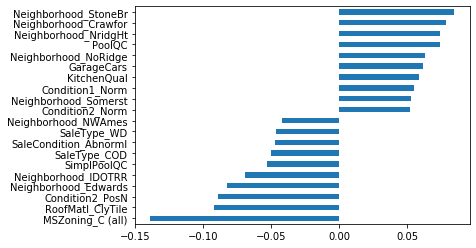

In [48]:
coefs = pd.Series(ridge.coef_,index=X_train.columns)
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])
img.plot(kind='barh')

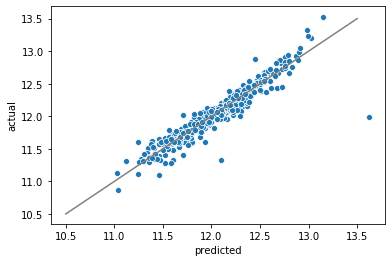

In [145]:
y_pred_rid=ridge.predict(X_test)
sns.scatterplot(y_pred_rid,y_test).set(xlabel='predicted',ylabel='actual')
plt.plot([10.5,13.5],[10.5,13.5],color='gray')

##### Lasso L1 Regularization

In [92]:
lasso = LassoCV(alphas=[0.0001,0.0003,0.0006,0.001,0.003,
                0.006,0.01,0.03,0.06,0.1,0.3,0.6,1],max_iter = 50000,cv=10)

In [93]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06,
                0.1, 0.3, 0.6, 1],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [94]:
alpha = lasso.alpha_

In [97]:
lasso= LassoCV(alphas=[alpha *.6,alpha*.65,alpha*.7,alpha*.75,alpha*.8,alpha*.85,alpha*.9,alpha*.95,
               alpha*1.05,alpha*1.1,alpha*1.15,alpha*1.2,alpha*1.25,alpha*1.3,alpha*1.35,alpha*1.4],
       max_iter = 50000,cv=10)

In [98]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.00035999999999999997, 0.00039, 0.00041999999999999996,
                0.00045, 0.00047999999999999996, 0.0005099999999999999, 0.00054,
                0.00057, 0.0006299999999999999, 0.00066, 0.0006899999999999999,
                0.0007199999999999999, 0.0007499999999999999, 0.00078, 0.00081,
                0.0008399999999999999],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [99]:
lasso.alpha_

0.00054

In [129]:
print('RMSE for training data is: ', rmse_cv_train(lasso).mean())
print('RMSE for test data is:',rmse_cv_test(lasso).mean())

RMSE for training data is:  0.118724788291836
RMSE for test data is: 0.1584024004120956


In [103]:
y_pred_las= lasso.predict(X_test)

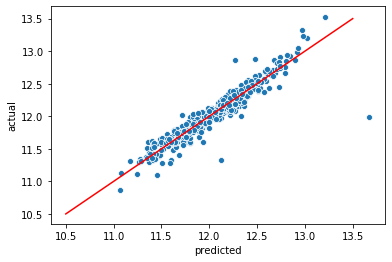

In [124]:
sns.scatterplot(y_pred_las,y_test).set(xlabel='predicted',ylabel='actual')
plt.plot([10.5,13.5],[10.5,13.5],color='red')

In [114]:
coefs = pd.Series(lasso.coef_,index=X_train.columns)

In [120]:
sum(coefs!=0)

119

In [116]:
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])

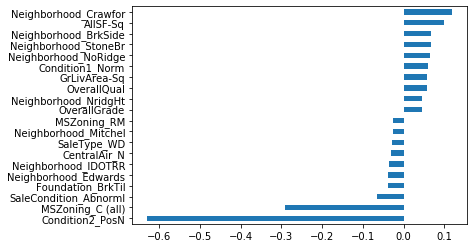

In [118]:
img.plot(kind='barh')

In [99]:
elasticNet=ElasticNetCV(l1_ratio=[0.1,0.3,0.6,0.7,0.8,0.85,0.9,0.95,1],
            alphas=[0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,
                   0.1,0.3,0.6,1,3,6],max_iter=50000,cv=10)

In [100]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.3, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [103]:
alpha = elasticNet.alpha_

In [105]:
ratio= elasticNet.l1_ratio_

In [108]:
elasticNet= ElasticNetCV(l1_ratio=[ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
            alphas=[0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,
                   0.1,0.3,0.6,1,3,6],max_iter=50000,cv=10)

In [109]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69], max_iter=50000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [110]:
## If l1_ratio=1, it means it uses lasso regressor, 0 means ridge
if(elasticNet.l1_ratio_>1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

In [112]:
elasticNet=ElasticNetCV(l1_ratio=ratio, alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4],max_iter=50000,cv=10)

In [113]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0006, 0.0006500000000000001, 0.0007, 0.00075, 0.0008,
                     0.00085, 0.0009000000000000001, 0.00095, 0.001,
                     0.0010500000000000002, 0.0011, 0.00115, 0.00125,
                     0.0013000000000000002, 0.00135, 0.0014],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.51,
             max_iter=50000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [114]:

if (elasticNet.l1_ratio_>1):
    elasticNet.l1_ratio_ = 1
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_

In [116]:
coefs = pd.Series(elasticNet.coef_,index=X_train.columns)

In [120]:
img = pd.concat([coefs.sort_values().head(10),coefs.sort_values().tail(10)])

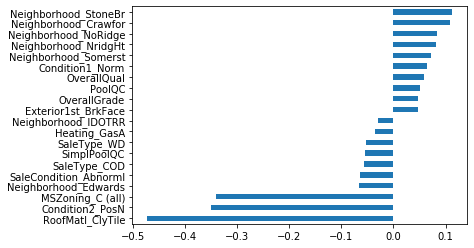

In [121]:
img.plot(kind='barh')

In [125]:
print('RMSE for Ridge is:',rmse_cv(ridge).mean())
print('RMSE for Lasso is:',rmse_cv(lasso).mean())
print('RMSE for ElasticNet is:',rmse_cv(elasticNet).mean())

RMSE for Ridge is: 0.11726319621410952
RMSE for Lasso is: 0.11987155899776
RMSE for ElasticNet is: 0.12031450425905603


## XGBoost 

In [70]:
from xgboost import XGBRegressor

In [71]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.05)

In [72]:
xgb.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],verbose=False)

[22:37:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
y_pred= xgb.predict(X_test)

In [76]:
### Model performs okay, variance is okay
RMSE = np.sqrt(-cross_val_score(xgb,X_test,y_test,scoring='neg_mean_squared_error',cv=10)).mean()

[22:41:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

0.13684391788753808

### Gradient Boosting Regressor


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
regressor = GradientBoostingRegressor(max_depth=2,n_estimators=4,learning_rate=0.5)

In [95]:
regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
errors = [mean_squared_error(y_test,y_pred) for y_pred in regressor.staged_predict(X_test)]

In [100]:
best_n_estimators= np.argmin(errors)

In [101]:
best_regressor=GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimators,learning_rate=0.05)

In [102]:
best_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
y_pred= best_regressor.predict(X_test)

In [106]:
## the lower max_depth, the better the test result
np.sqrt(-cross_val_score(best_regressor,X_test,y_pred,scoring='neg_mean_squared_error',cv=10)).mean()

0.03821096985670145

### Import test.csv 

In [34]:
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
          test_df.loc[:,'MSSubClass':'SaleCondition']))

In [35]:
cat_feature = all_data.select_dtypes(include=['object']).columns
num_feature = all_data.select_dtypes(exclude=['object']).columns

In [36]:
skew = all_data[num_feature].apply(lambda x:skew(x))
skew = skew[abs(skew)>0.5]
skew_feature = skew.index
all_data[skew_feature]=np.log1p(all_data[skew_feature])

In [39]:
train_df['SalePrice']=np.log1p(train_df.SalePrice)

In [40]:
all_data = pd.get_dummies(all_data)
all_data= all_data.fillna(all_data.mean())

In [116]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR 

In [117]:
cv = KFold(n_splits=3,random_state=43,shuffle=False)
svr = SVR(kernel='rbf')

### Whats the problem here???

In [114]:
for train_index,test_index in cv.split(train):
    print('Train Index:',train_index)
    print('Test Index:',test_index)
    X_train,X_test,y_train,y_test = train[train_index],train[test_index],train[train_index],train[test_index]

Train Index: [ 487  488  489  490  491  492  493  494  495  496  497  498  499  500
  501  502  503  504  505  506  507  508  509  510  511  512  513  514
  515  516  517  518  519  520  521  522  523  524  525  526  527  528
  529  530  531  532  533  534  535  536  537  538  539  540  541  542
  543  544  545  546  547  548  549  550  551  552  553  554  555  556
  557  558  559  560  561  562  563  564  565  566  567  568  569  570
  571  572  573  574  575  576  577  578  579  580  581  582  583  584
  585  586  587  588  589  590  591  592  593  594  595  596  597  598
  599  600  601  602  603  604  605  606  607  608  609  610  611  612
  613  614  615  616  617  618  619  620  621  622  623  624  625  626
  627  628  629  630  631  632  633  634  635  636  637  638  639  640
  641  642  643  644  645  646  647  648  649  650  651  652  653  654
  655  656  657  658  659  660  661  662  663  664  665  666  667  668
  669  670  671  672  673  674  675  676  677  678  679  680  68

KeyError: "None of [Int64Index([ 487,  488,  489,  490,  491,  492,  493,  494,  495,  496,\n            ...\n            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],\n           dtype='int64', length=973)] are in the [columns]"